In [2]:
# import modules
import random
import matplotlib.pyplot as plt

In [3]:
#Define Individual Class
# needs phenotype attribute

class individual:
    
    def __init__(self,id="id",color="white"): # Add default values for phenotype 
        self.color=color               #self attribute self.color is called by color 
        self.id=id
## Method to create random indi movement  
    
    def move(self,s=0.8,l=0.2):   ##  user inpusts stay and leave probabilites for the move funtion with defautl to 0.8 stay
        
        moves = random.choices(population=['stay','leave'], weights=[s,l]) ## Randomly draws a direction with weight-choices 
        return moves[0]  ## returns if the indi stays or moves (0 chooses the first element in the output list (this eliminates the ' marks))
        

In [ ]:
## Testing individual and move method
#for i in range (1,10):
 #   test1=individual()
 #   result=test1.move(0.1,0.9)


In [4]:
#Define Population Class
# needs a list of individuals that is updated as indis 
# needs methods: to add and remove indits; and calculate & print frequency of phenotypes amoong indis.

class population:
    
    def __init__(self,popSize=100,pheno="white",s=0.8,l=0.2):  #setting defaults  
        
        self.popSize=popSize  ### default population color./phenotype is white
        self.leaveProb=l     ## s & l correspond to the default probabilites  staying or leaving (same defauls as the indis)
        self.stayProb=s
        
        
        indis_list=[]    ## creating an empty list for individuals 
        
        for i in range (0, popSize):
            indis_list.append(individual(id=i+1,color=pheno))   ## append the individual to the empty list, color corresponds to the color of individuals in a population (defult white)
        self.indis_list=indis_list
                        # This creates a list of individuals in the population. The 
                        # number of individs equals to popsize (whith phenotypes recorded)
   

 ## Method to add & remove indis from population

    def PopMove(self): # make individuals move (stay or leave) 
        posList=[]     # empty list to store moves
        for i in self.indis_list:  
            posList.append(i.move(self.stayProb,self.leaveProb))  ## append the movement to the posList. 
        self.posList=posList   ##save the list as attribute of popuulation 
        return posList
  ## at this point i have 2 lists indis_list and posList that correspond positionally to the individiual and if they stay or left

 ##method to create lists of stayers and leavers and remove traitors from pop
    def DestList(self):
        traitors=[]   ##empty lists to store leavers (traitors) and stayers (heros)
        heros=[]
        
           ## next every decision is associated with the inidi from the indis list 
        for i in range (len(self.posList)):  
            if self.posList[i]=="stay":
                heros.append(self.indis_list[i])
            else:
                traitors.append(self.indis_list[i])   ## now have lists of indis that stayed and leaved 
    ## update the population
        self.indis_list=heros   
        self.popSize= len(heros)
        return traitors
  
       
        
        ## method to adopt foreign traitors into populaion 
    def convertTraitors(self,newcomers=[]):
          ## newcomers is a list of traitors will be added to this list to be added to poplist
        for i in newcomers:
            self.indis_list.append(i)
        self.popSize=len(self.indis_list)  ##update popsize
    
## method estimate frequencies 

    def Frequencies(self):
        phenoDict={"white":0,"Black":0}  # dictionary of phenotypes in population
        for i in self.indis_list:
            if i.color== "white":
                phenoDict["white"]=phenoDict["white"]+1   ##update counts for white and black phenos
            else:
                phenoDict["Black"]=phenoDict["Black"]+1
                
        whiteFreq=phenoDict["white"]/self.popSize
        blackFreq=phenoDict["Black"]/self.popSize   ## calulate the frequenceis
        return [whiteFreq,blackFreq]

In [93]:
## Testing population moveing 
#pop_trait = [individual(color = 'Black'), individual(color = 'Black')]
#pop1=population() 
#print(pop1.popSize)
#pop1.PopMove()
#pop1.DestList()
#print(pop1.popSize)
#print(pop1.Frequencies())
#pop1.convertTraitors(pop_trait)
#pop1.popSize
#print('pop1 invaded:')
#print(pop1.Frequencies())


100
73
[1.0, 0.0]
pop1 invaded:
[0.9733333333333334, 0.02666666666666667]


In [5]:
#Define Landscape Calss
# needs a list of populations and dispersal matrix


class Landscape:
    def __init__(self,matrix=[[0.8,0.2],[0.9,0.1]], weeks=12):   ## [default freq for dispersal matrix for pop 1 and pop 2]
        self.weeks=weeks
        
        self.Rosemarys=population(pheno="white",s=matrix[0][0], l=matrix[0][1])  ## setting the s and l freq as the user input 
        self.Peters=population(pheno="Black",s=matrix[1][0], l=matrix[1][1])
        
        self.RoseFreq=[self.Rosemarys.Frequencies()]   ## lists to store frequences and sizes of pops
        self.RoseSize=[self.Rosemarys.popSize]
        self.PeterFreq=[self.Peters.Frequencies()]
        self.PeterSize=[self.Peters.popSize]
        
        
        ##method to move both pops. 
    def movePops(self):
        for i in range (0,self.weeks):
            self.Rosemarys.PopMove()   ##move pop
            RoseTraitors=self.Rosemarys.DestList()  ##create tritors 
            self.Peters.PopMove()  ##move 
            PeterTraitors=self.Peters.DestList()  ## get traitors
        
            self.Rosemarys.convertTraitors(PeterTraitors)  ## adding traitors to pop 
            self.Peters.convertTraitors(RoseTraitors)
            
            
            self.RoseFreq.append(self.Rosemarys.Frequencies())  
            self.RoseSize.append(self.Rosemarys.popSize)
            self.PeterFreq.append(self.Peters.Frequencies())
            self.PeterSize.append(self.Peters.popSize)
            
    def Sizeplot(self):
        plt.ylabel("Population Size")
        plt.xlabel("Weeks")
        plt.plot(range (0,self.weeks+1),self.RoseSize)
        plt.plot(range(0,self.weeks+1),self.PeterSize)          ### White population is represented as blue and black population is rep as orange. 
    
    def phenoplot(self):
        rosewhitefreq=[x[0] for x in self.RoseFreq]
        peterwhitefreq=[x[0] for x in self.PeterFreq]
        plt.ylabel("White Phenotype Frequency")
        plt.xlabel("Weeks")
        plt.plot(range (0,self.weeks+1),rosewhitefreq)
        plt.plot(range(0,self.weeks+1),peterwhitefreq)   
        

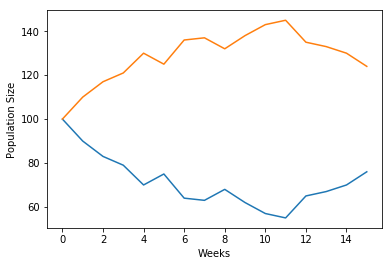

In [48]:
### testing 

wonderlandPop=population(popSize=100)
wonderland=Landscape(matrix=[[0.8,0.2],[0.9,0.1]],weeks=15)
wonderland.movePops()
wonderland.Sizeplot()



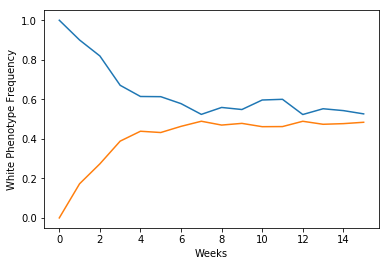

In [49]:
wonderland.phenoplot()

In [32]:
Questions:
    1. The frequencies of the phentypes osscialte with each other in a consistent fashion. 
        At the start of the populations, just after mixing the white frequency drops then evens out to roughly half of each population. With the 
        frequencey of white in the populations rarely changes more than a few percent. 
        
    2. With increase in movement rates, the populations experience greater shifts in population sizes compared to smaller rates of "leavers"
        The phenotype frequenceis experiences sharp changes at the beginning and then continuous realtively stabel ossicilation.
    
    3.  As I understnad this questions, we should model if one population the White rosemarys, have a greater probability of retaining its populations, 
        and of recieving new comers ( so this populations is more prefered). If this is the correct interpertation of the questions then, the white populations
        has a much larger population size, but the frequencieis of phenos is realtivley 0.5 because of the increased rate of peters phenos entering the population.
        
        I also interperted this question a second way, with the meaning that the individuals in the pops have higher frequencies of leaving than staying.
        Up to this point all my simulations have had the black poulation (peters) with a higher frequency of staying than the white (rosemarys)
        After a few weeks (~6) The phenotypes stays around 50% of the each population comapred to this occuring sooner with more balanced propabilities.
    
    4. With big populations, the frequencies of the white phenotypes in the rosemary (white) population stay at a frequency usually closer to 0.6, than do 
        the rosemarys in the peter (black) populations. 
        with smaller populations the frequencies osscilate closer to 0.5. 

SyntaxError: invalid syntax (<ipython-input-32-97b4703f26a3>, line 1)